In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data and performing EDA
company_data=pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-14/Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [41]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [43]:
company_data[company_data.duplicated()] #No duplicates found

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [42]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
# Converting the Target column i.e. Sales into Categorical value using mean of the column i.e. 7.49
sales_val = []

for value in company_data['Sales']:
    if value>=7.49:
        sales_val.append('high')
    else:
        sales_val.append('low')

company_data['sales_val'] = sales_val

In [5]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [6]:
X = company_data.iloc[:,1:11]
y = company_data.iloc[:,-1]

In [133]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [134]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [7]:
#train test split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=12)

In [149]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
199,122,88,5,335,126,Medium,64,14,Yes,Yes
43,123,42,11,16,134,Medium,59,13,Yes,Yes
307,138,92,0,13,120,Bad,61,12,Yes,No
166,119,67,17,151,137,Medium,55,11,Yes,Yes
64,100,67,12,184,104,Medium,32,16,No,Yes
...,...,...,...,...,...,...,...,...,...,...
241,136,63,0,160,94,Medium,38,12,Yes,No
253,124,24,5,288,122,Medium,57,12,No,Yes
390,108,75,9,61,111,Medium,67,12,Yes,Yes
155,98,72,0,59,69,Medium,65,16,Yes,No


In [9]:
#Using encoders to change the Categorical values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

In [10]:
transformer = ColumnTransformer(transformers=[('tnf2',OneHotEncoder(drop='first'),['Urban','US']),
                                               ('tnf3',OrdinalEncoder(categories=[['Bad','Medium','Good']]),['ShelveLoc'])], remainder='passthrough')

In [11]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

In [12]:
le = LabelEncoder()

In [13]:
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.transform(y_test)

In [14]:
#Model building
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train_trans,y_train_trans)

DecisionTreeClassifier()

In [16]:
#Model selection
from sklearn.model_selection import GridSearchCV

In [18]:
grid_search = GridSearchCV(estimator=model,param_grid = {'max_depth': range(1,10),'criterion':['gini','entropy']},cv=5)
grid_search.fit(X_train_trans,y_train_trans)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

In [19]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [20]:
grid_search.best_score_

0.753125

In [21]:
#Model training
final_model = DecisionTreeClassifier(criterion='gini',max_depth=7)
final_model.fit(X_train_trans,y_train_trans)

DecisionTreeClassifier(max_depth=7)

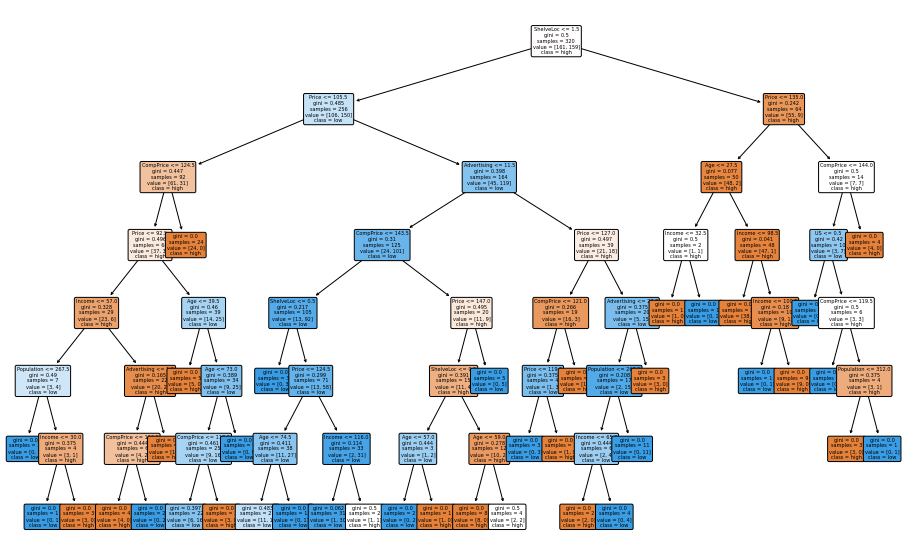

In [261]:
# Prepare a plot figure with set size.
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (16,10))

# Plot the decision tree.
plot_tree(final_model,feature_names= ['Urban', 'US','ShelveLoc','CompPrice','Income','Advertising','Population','Price', 'Age', 'Education']
          ,class_names= ['high','low'],rounded = True,filled = True,fontsize=5)# Display the tree plot figure.
plt.show()

In [22]:
#Model testing
y_train_pred = final_model.predict(X_train_trans)
y_test_pred = final_model.predict(X_test_trans)

In [23]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [29]:
print('training Accuracy  : ',accuracy_score(y_train_trans,y_train_pred))
print('test Accuracy      : ',accuracy_score(y_test_trans,y_test_pred))
print('training confusion_matrix  : \n',confusion_matrix(y_train_trans,y_train_pred))
print('test confusion_matrix  : \n',confusion_matrix(y_test_trans,y_test_pred))

training Accuracy  :  0.934375
test Accuracy      :  0.775
training confusion_matrix  : 
 [[143  18]
 [  3 156]]
test confusion_matrix  : 
 [[30 10]
 [ 8 32]]


In [26]:
#Checking for the attributes causing high sale
final_model.feature_importances_

array([0.        , 0.02900857, 0.17290931, 0.1957441 , 0.07176668,
       0.08332599, 0.04572779, 0.31073322, 0.09078435, 0.        ])

In [52]:
fn=['Urban', 'US','ShelveLoc','CompPrice','Income','Advertising','Population','Price', 'Age', 'Education']
feature= pd.Series(final_model.feature_importances_,index=fn).sort_values(ascending=False)
feature

Price          0.310733
CompPrice      0.195744
ShelveLoc      0.172909
Age            0.090784
Advertising    0.083326
Income         0.071767
Population     0.045728
US             0.029009
Urban          0.000000
Education      0.000000
dtype: float64

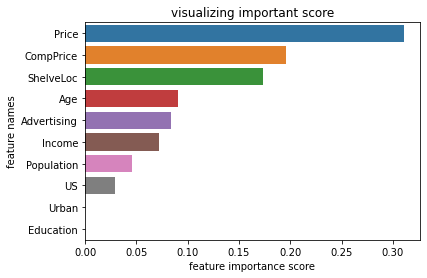

In [53]:
import seaborn as sns
sns.barplot(x=feature,y=feature.index)
plt.xlabel("feature importance score")
plt.ylabel("feature names")
plt.title("visualizing important score")
plt.show()

In [37]:
# Since there is overfitting problem
# Prunning the tree

In [38]:
#model 1 : criterion='gini',max_depth=6
model1 = DecisionTreeClassifier(criterion='gini',max_depth=6)
model1.fit(X_train_trans,y_train_trans)

y_train_pred1 = model1.predict(X_train_trans)
y_test_pred1 = model1.predict(X_test_trans)

print('training Accuracy  : ',accuracy_score(y_train_trans,y_train_pred1))
print('test Accuracy      : ',accuracy_score(y_test_trans,y_test_pred1))
print('training confusion_matrix  : \n',confusion_matrix(y_train_trans,y_train_pred1))
print('test confusion_matrix  : \n',confusion_matrix(y_test_trans,y_test_pred1))

training Accuracy  :  0.90625
test Accuracy      :  0.775
training confusion_matrix  : 
 [[136  25]
 [  5 154]]
test confusion_matrix  : 
 [[29 11]
 [ 7 33]]


In [48]:
#model 2 : criterion='gini',max_depth=5
model2 = DecisionTreeClassifier(criterion='gini',max_depth=5)
model2.fit(X_train_trans,y_train_trans)

y_train_pred2 = model2.predict(X_train_trans)
y_test_pred2 = model2.predict(X_test_trans)

print('training Accuracy  : ',accuracy_score(y_train_trans,y_train_pred2))
print('test Accuracy      : ',accuracy_score(y_test_trans,y_test_pred2))
print('training confusion_matrix  : \n',confusion_matrix(y_train_trans,y_train_pred2))
print('test confusion_matrix  : \n',confusion_matrix(y_test_trans,y_test_pred2))

training Accuracy  :  0.890625
test Accuracy      :  0.8125
training confusion_matrix  : 
 [[133  28]
 [  7 152]]
test confusion_matrix  : 
 [[31  9]
 [ 6 34]]


In [49]:
#model 3 : criterion='entropy',max_depth=5
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model3.fit(X_train_trans,y_train_trans)

y_train_pred3 = model3.predict(X_train_trans)
y_test_pred3 = model3.predict(X_test_trans)

print('training Accuracy  : ',accuracy_score(y_train_trans,y_train_pred3))
print('test Accuracy      : ',accuracy_score(y_test_trans,y_test_pred3))
print('training confusion_matrix  : \n',confusion_matrix(y_train_trans,y_train_pred3))
print('test confusion_matrix  : \n',confusion_matrix(y_test_trans,y_test_pred3))

training Accuracy  :  0.8625
test Accuracy      :  0.725
training confusion_matrix  : 
 [[121  40]
 [  4 155]]
test confusion_matrix  : 
 [[23 17]
 [ 5 35]]


In [50]:
#model 4 : criterion='entropy',max_depth=4
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model4.fit(X_train_trans,y_train_trans)

y_train_pred4 = model4.predict(X_train_trans)
y_test_pred4 = model4.predict(X_test_trans)

print('training Accuracy  : ',accuracy_score(y_train_trans,y_train_pred4))
print('test Accuracy      : ',accuracy_score(y_test_trans,y_test_pred4))
print('training confusion_matrix  : \n',confusion_matrix(y_train_trans,y_train_pred4))
print('test confusion_matrix  : \n',confusion_matrix(y_test_trans,y_test_pred4))

training Accuracy  :  0.803125
test Accuracy      :  0.7875
training confusion_matrix  : 
 [[138  23]
 [ 40 119]]
test confusion_matrix  : 
 [[33  7]
 [10 30]]


In [54]:
model4.feature_importances_

array([0.        , 0.0193359 , 0.21981264, 0.12070901, 0.        ,
       0.21893656, 0.        , 0.32938415, 0.09182174, 0.        ])

In [56]:
fn=['Urban', 'US','ShelveLoc','CompPrice','Income','Advertising','Population','Price', 'Age', 'Education']
feature1= pd.Series(model4.feature_importances_,index=fn).sort_values(ascending=False)
feature1

Price          0.329384
ShelveLoc      0.219813
Advertising    0.218937
CompPrice      0.120709
Age            0.091822
US             0.019336
Urban          0.000000
Income         0.000000
Population     0.000000
Education      0.000000
dtype: float64

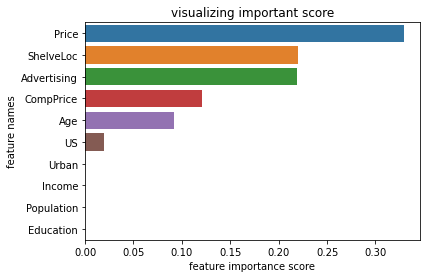

In [57]:
import seaborn as sns
sns.barplot(x=feature1,y=feature1.index)
plt.xlabel("feature importance score")
plt.ylabel("feature names")
plt.title("visualizing important score")
plt.show()